## This data is related with direct marketing campaings of a Portuguese banking institution.

- Campaign is based on Contacts (Phone calls)
- Product is the Bank Term Deposit,(YES/No)if they subscribed
## The goal of this project is to predict if a Client will subscribe a Term Deposit or Not.

- A Term Deposit account is a type of deposit account held at a financial institution with money in it for a set period.



In [1]:
##Importing libraries for Data Analysis
import numpy as np
import pandas as pd
#Importing libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the Data Set:
bank=pd.read_csv('bank.csv')

In [3]:
#viewig the first 10 Rows of our data using head()
bank.head(20)

,age,"""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y"""
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


### DATA CLEANING
- Checking Missing Values 

- Checking if our features have the right Dtypes

- Checking duplicates

- Renaming or Replacing texts

In [4]:
## checking Missing Values and Suming the missing values up.
bank.isna().sum()

age               0
   "job"          0
   "marital"      0
   "education"    0
 "default"        0
 "balance"        0
 "housing"        0
 "loan"           0
 "contact"        0
 "day"            0
 "month"          0
 "duration"       0
 "campaign"       0
  "pdays"         0
  "previous"      0
  "poutcome"      0
  "y"             0
dtype: int64

In [5]:
# data types of the data set:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             4521 non-null   int64 
 1      "job"        4521 non-null   object
 2      "marital"    4521 non-null   object
 3      "education"  4521 non-null   object
 4    "default"      4521 non-null   object
 5    "balance"      4521 non-null   int64 
 6    "housing"      4521 non-null   object
 7    "loan"         4521 non-null   object
 8    "contact"      4521 non-null   object
 9    "day"          4521 non-null   int64 
 10   "month"        4521 non-null   object
 11   "duration"     4521 non-null   int64 
 12   "campaign"     4521 non-null   int64 
 13    "pdays"       4521 non-null   int64 
 14    "previous"    4521 non-null   int64 
 15    "poutcome"    4521 non-null   object
 16    "y"           4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
# checking duplicates in our data 
bank.duplicated().sum()

0

In [7]:
#lets see if our Attributes are in the right format
bank.columns

Index(['age', '   "job" ', '   "marital"', '   "education"', ' "default"',
       ' "balance"', ' "housing"', ' "loan"', ' "contact"', ' "day"',
       ' "month"', ' "duration"', ' "campaign"', '  "pdays"', '  "previous"',
       '  "poutcome"', '  "y"'],
      dtype='object')

In [8]:
## our columns are not properly created, lets rename our columns by creating a list
bank.columns=['Age','Job','Marital','Education','Default','Balance','Housing','Loan','Contact','Day','Month','Duration',
              'Campaign','P_days','Previous','Outcome','Deposit']

In [9]:
#now our attributes are quite good now
bank.head(20)

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,P_days,Previous,Outcome,Deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [10]:
#lets view our total numnber of Rows and column
bank.shape

(4521, 17)

In [11]:
# Statistical Analysis of the Data
bank.describe()

,Age,Balance,Day,Duration,Campaign,P_days,Previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### EXPLORATORY DATA ANALYSIS

In [12]:
# Age
# lets create a function that categorizes Client's Age
# To get the age group:find the range of age,divide by your prefered group to get your interval
#interval=(max-min)/5

def age_group(Age):
    if Age <=33:
        return 'Youth (19-33)'
    elif Age<=48:
        return 'Adult (34-48)'
    elif Age<=63:
        return 'Old Adult(49-63)'
    elif Age<=78:
        return 'Elder(64-78)'
    else:
        return 'Aged(79-93)'
    
## lets create a new column for age category and pass our function to the new column
bank['Age_Group']=bank['Age'].apply(age_group)
        
    

In [13]:
bank.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,P_days,Previous,Outcome,Deposit,Age_Group
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Youth (19-33)
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Youth (19-33)
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Adult (34-48)
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Youth (19-33)
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Old Adult(49-63)


<AxesSubplot:xlabel='Age_Group', ylabel='count'>

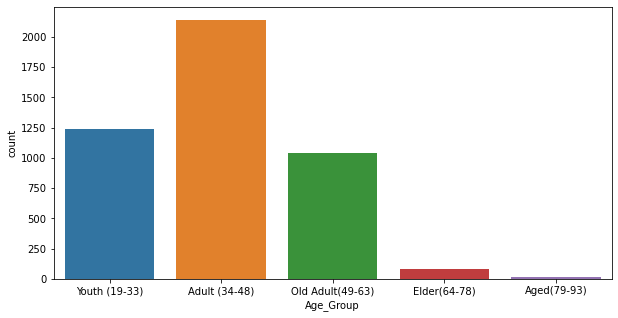

In [14]:
## visulaizing our age category
plt.figure(figsize=(10,5))
sns.countplot('Age_Group',data=bank)

### From the chart above:

In [15]:
# clients within (34-48) has the highest Age Frequency  from our Chart

<AxesSubplot:>

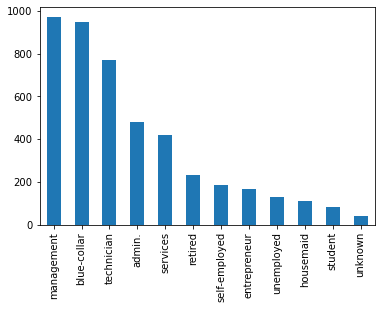

In [16]:
#let's view the job type that occured most
bank.Job.value_counts().plot.bar()

In [17]:
# from Bar Plot,Managment Job occured most, followed by blue-collar Job.

<AxesSubplot:xlabel='Age', ylabel='Count'>

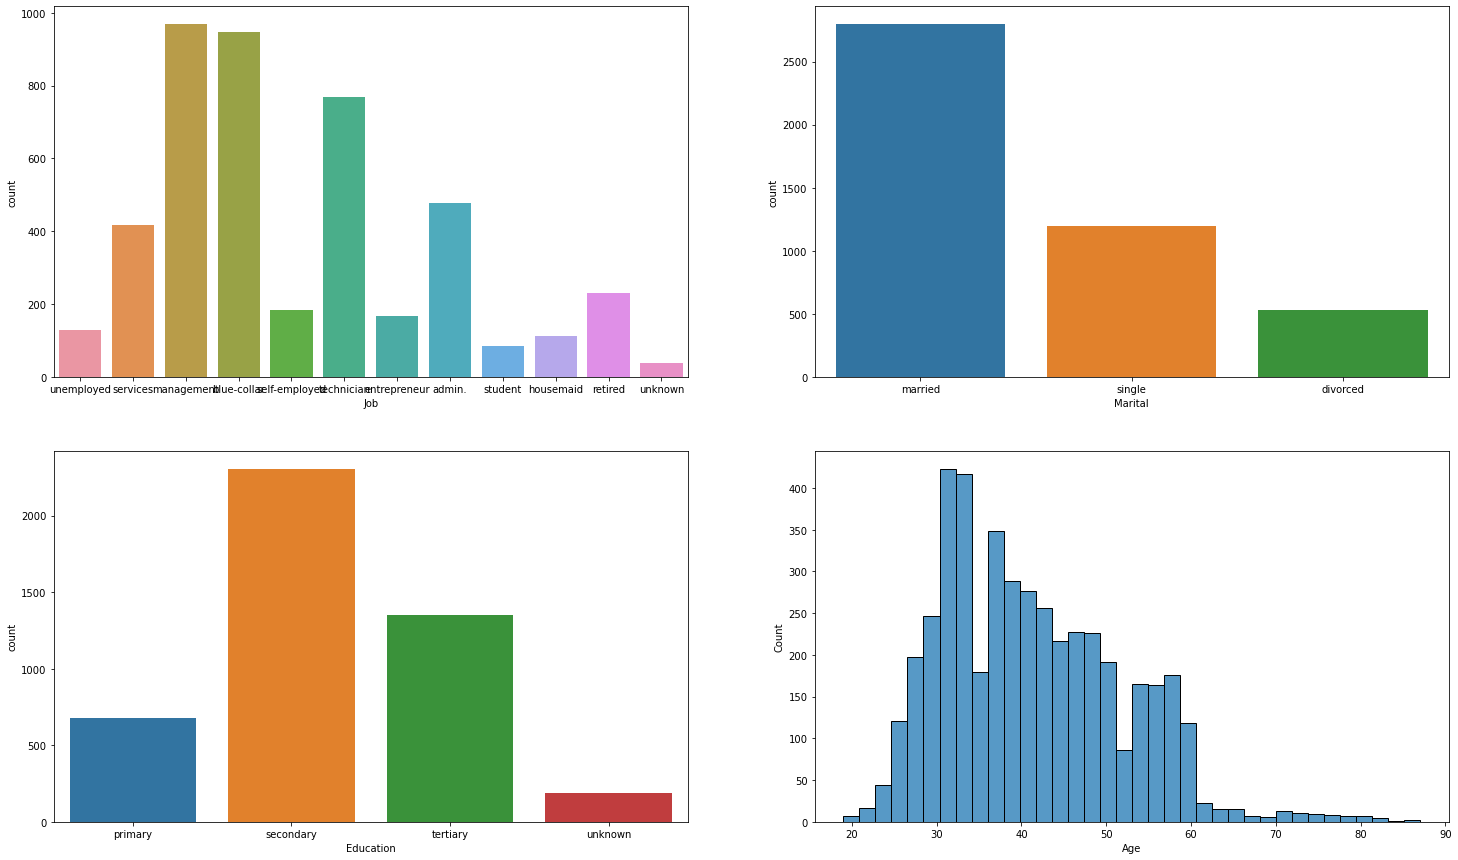

In [20]:
#lets create a subplot showing age distribution, Education,Marital and Job attributes
fig,axes=plt.subplots(2,2,figsize=(25,15))
sns.countplot(x='Job',data=bank,ax=axes[0,0])
sns.countplot(x='Marital',data=bank,ax=axes[0,1])
sns.countplot(x='Education',data=bank,ax=axes[1,0])
sns.histplot(x='Age',data=bank,ax=axes[1,1])

- 90% of bank clients in our data set have management jobs followed by blue collar job.
- More married clients than single and divorced clients.
- Most of our Bank clients obtained secondary education.


Text(0, 0.5, 'count')

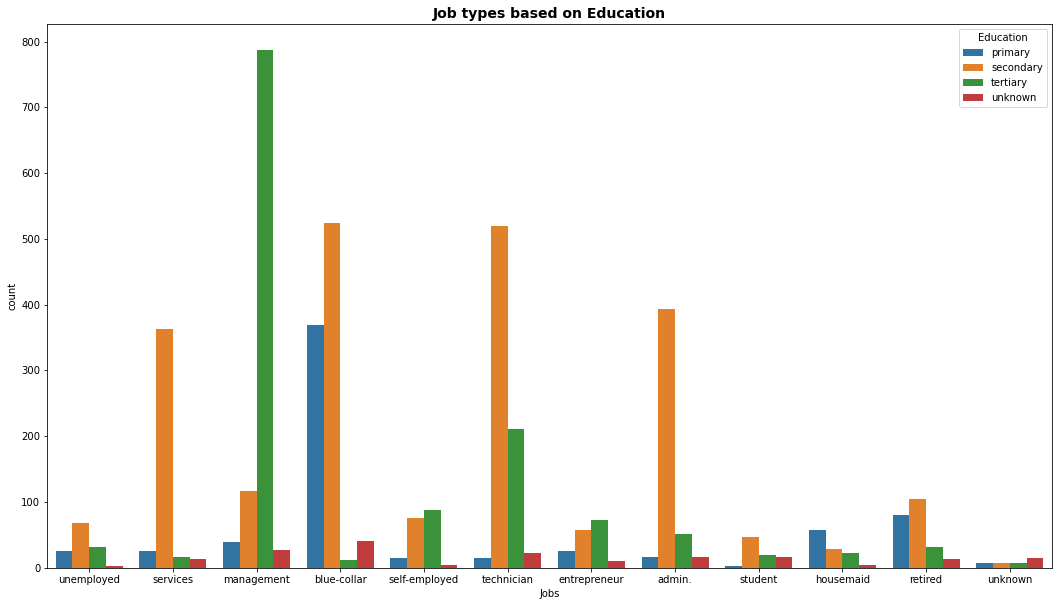

In [25]:
plt.figure(figsize=(18,10))
sns.countplot(x='Job',data=bank,hue='Education')
plt.title("Job types based on Education",fontsize=14,fontweight='bold')
plt.xlabel('Jobs')
plt.ylabel("count")

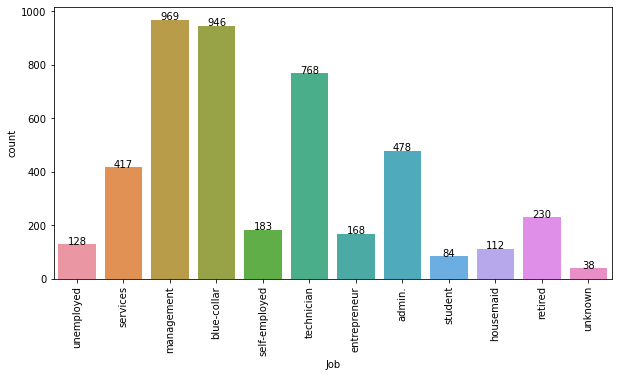

In [27]:
#lets count the number of job types for each job's
fig,ax1=plt.subplots(figsize=(10,5))
viz=sns.countplot(ax=ax1,x='Job',data=bank)
viz.set_xticklabels(viz.get_xticklabels(),rotation=90)
for i in viz.patches:
    height=i.get_height()
    viz.text(i.get_x()+i.get_width()/2,height+0.1, height,ha='center')

Text(0.5, 1.0, 'Number of clients that deposited by Marital Status')

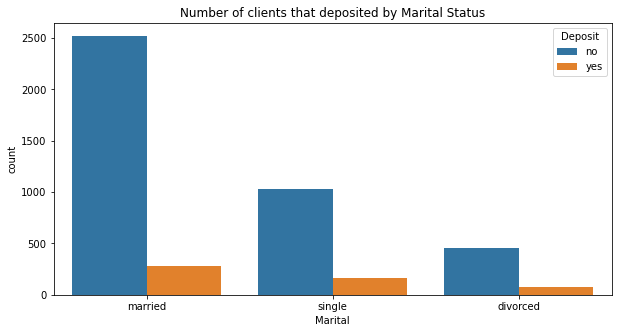

In [28]:
# check types of clients that deposited or not
plt.figure(figsize=(10,5))
sns.countplot(x='Marital',data=bank,hue='Deposit')
plt.title("Number of clients that deposited by Marital Status")


Text(0.5, 1.0, "Deposit based on client's jobs")

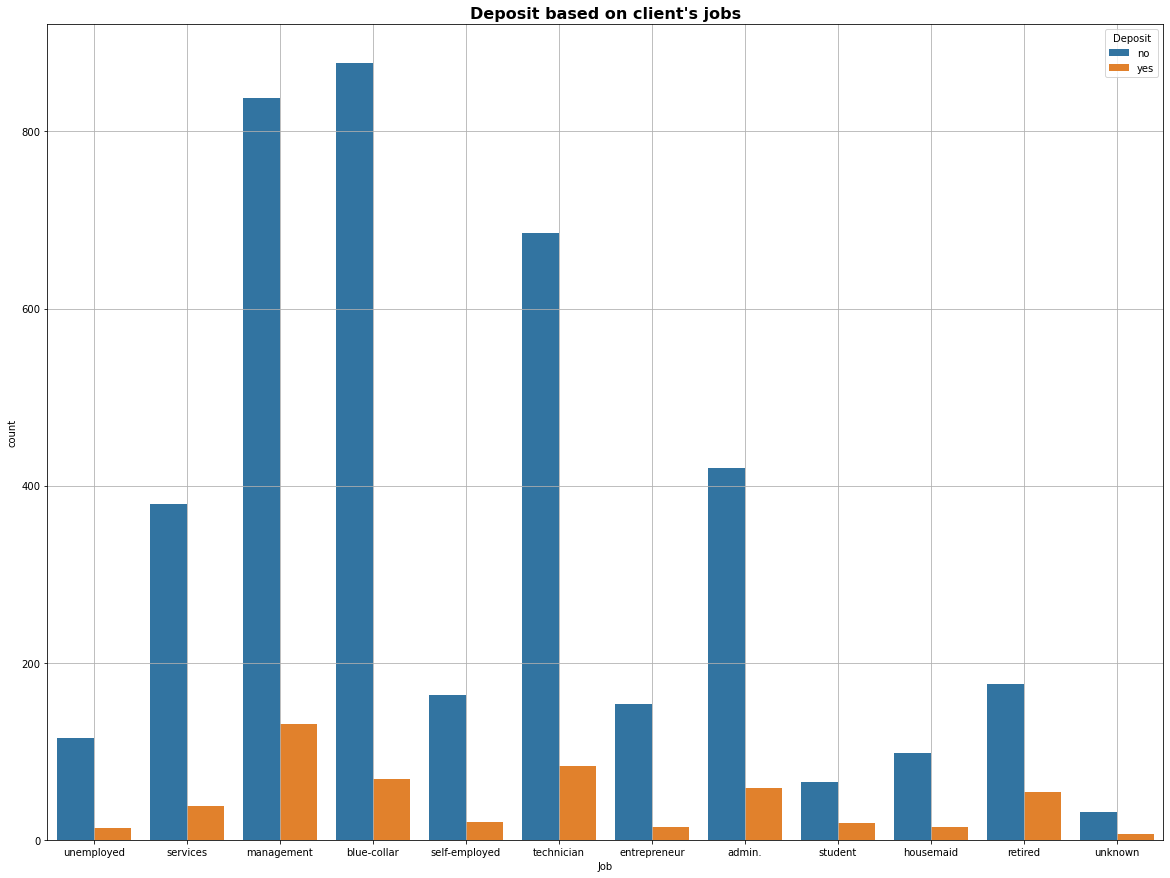

In [30]:
plt.figure(figsize=(20,15))
sns.countplot(x='Job',data=bank,hue='Deposit')
plt.grid()
plt.title("Deposit based on client's jobs",fontsize=16,fontweight='bold')


In [31]:
# 50% clients that have management jobs subscribed for Term Deposit

<AxesSubplot:>

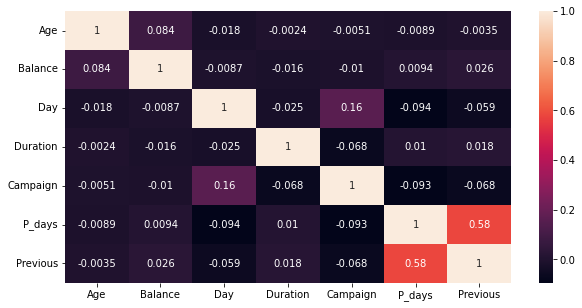

In [108]:
#to check for correlation between features
plt.figure(figsize=(10,5))
sns.heatmap(bank.corr(),annot=True)

<AxesSubplot:xlabel='Marital,Deposit'>

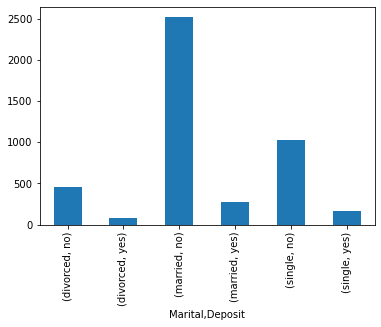

In [35]:
bank.groupby('Marital')[['Deposit']].value_counts().plot.bar()

In [36]:
# the percentage of clients that subscribed to term deposit is lower compared to the clients that didnt subscribe

Text(0.5, 1.0, 'Housing and Deposit')

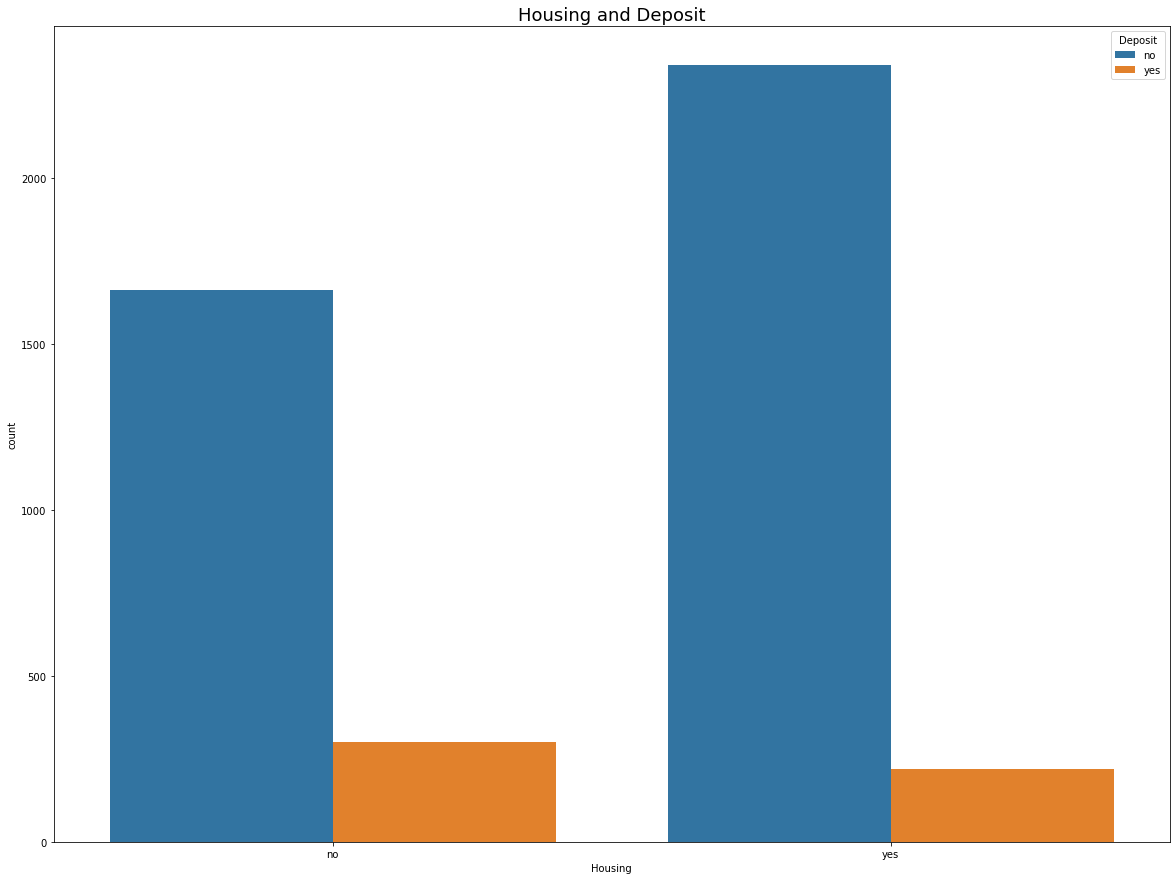

In [43]:
#check for housing loan and deposits
plt.figure(figsize=(20,15))
sns.countplot(x='Housing',data=bank,hue='Deposit')
plt.title("Housing and Deposit",fontsize=18)


In [37]:
#client's that didnt have housing loan tend to subscribe more for term deposit

Text(0.5, 1.0, 'Loans and Deposit')

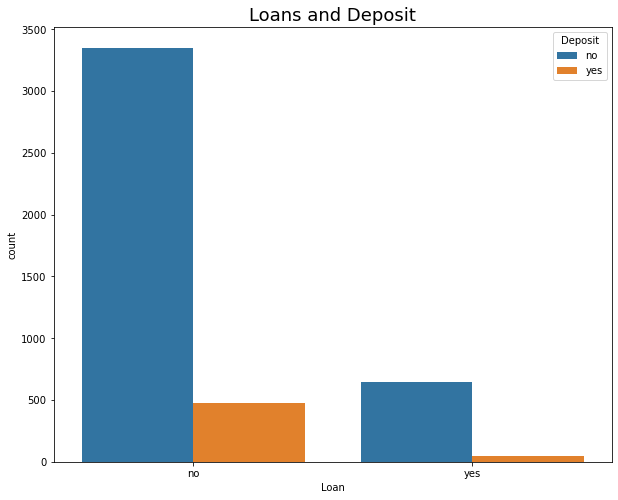

In [185]:
#loan and deposits
plt.figure(figsize=(10,8))
sns.countplot(x='Loan',data=bank,hue='Deposit')
plt.title("Loans and Deposit",fontsize=18)


In [38]:
#client's without personal loans subscribed more for term deposits

Text(0.5, 1.0, 'Default and Deposit')

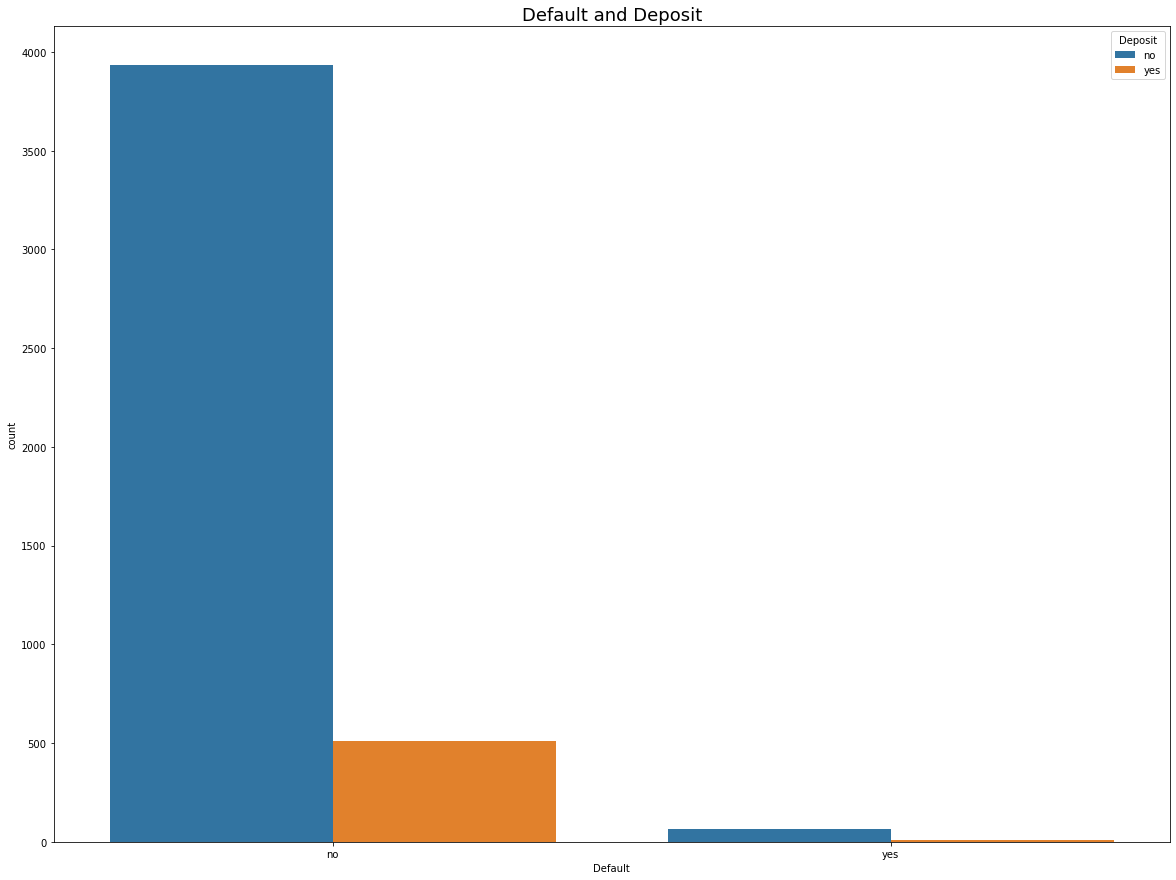

In [45]:
#lets check if defaulters deposited or not
plt.figure(figsize=(20,15))
sns.countplot(x='Default',data=bank,hue='Deposit')
plt.title("Default and Deposit",fontsize=18)


In [46]:
# 70% of non defaulters didnt subscribe for term deposit
#30% of non defaulters subscribe for term deposit
# The chances of defaulter subscribing for a term deposit is low

In [47]:
#view clients and their bank balance based on marital status.
bank.groupby('Marital')[['Balance']].mean()

,Balance
Marital,
divorced,1122.390152
married,1463.195567
single,1460.414716


## Binary Classification

In [48]:
#make a copy of our data set
df=bank.copy()

In [49]:
#view the first five rows
df.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,P_days,Previous,Outcome,Deposit,Age_Group
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Youth (19-33)
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Youth (19-33)
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Adult (34-48)
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Youth (19-33)
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Old Adult(49-63)


In [52]:
#drop age_group
df.drop('Age_Group',axis=1,inplace=True)

In [53]:
#encode values in the data set by replacing with o and 1
df.replace('yes',1,inplace=True)
df.replace('no',0,inplace=True)

In [54]:
df.head(4)

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,P_days,Previous,Outcome,Deposit
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0


In [67]:
#select categorical variables and save it to a variable
Attributes=['Job','Marital','Education','Contact','Month','Outcome']

In [69]:
#filter using the variable created
df[Attributes]

,Job,Marital,Education,Contact,Month,Outcome
0,unemployed,married,primary,cellular,oct,unknown
1,services,married,secondary,cellular,may,failure
2,management,single,tertiary,cellular,apr,failure
3,management,married,tertiary,unknown,jun,unknown
4,blue-collar,married,secondary,unknown,may,unknown
...,...,...,...,...,...,...
4516,services,married,secondary,cellular,jul,unknown
4517,self-employed,married,tertiary,unknown,may,unknown
4518,technician,married,secondary,cellular,aug,unknown
4519,blue-collar,married,secondary,cellular,feb,other


In [70]:
#use pd.get_dummies() to one-hot encode a dataframe of the categorical values.  
#Save the encoded variables in a separate variable 
attributes_dummy=pd.get_dummies(df[Attributes])
#view the dataset
attributes_dummy.head()

,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,...,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,Outcome_failure,Outcome_other,Outcome_success,Outcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [71]:
#view the data types
attributes_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Job_admin.           4521 non-null   uint8
 1   Job_blue-collar      4521 non-null   uint8
 2   Job_entrepreneur     4521 non-null   uint8
 3   Job_housemaid        4521 non-null   uint8
 4   Job_management       4521 non-null   uint8
 5   Job_retired          4521 non-null   uint8
 6   Job_self-employed    4521 non-null   uint8
 7   Job_services         4521 non-null   uint8
 8   Job_student          4521 non-null   uint8
 9   Job_technician       4521 non-null   uint8
 10  Job_unemployed       4521 non-null   uint8
 11  Job_unknown          4521 non-null   uint8
 12  Marital_divorced     4521 non-null   uint8
 13  Marital_married      4521 non-null   uint8
 14  Marital_single       4521 non-null   uint8
 15  Education_primary    4521 non-null   uint8
 16  Education_secondary  452

In [72]:
#view the dimensionality
attributes_dummy.shape

(4521, 38)

In [73]:
#join the encoded variables into the original dataset
df=pd.concat([df,attributes_dummy],axis=1)

In [74]:
df.shape

(4521, 55)

In [75]:
#view the data set
df.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,...,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,Outcome_failure,Outcome_other,Outcome_success,Outcome_unknown
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,...,0,0,0,0,1,0,0,0,0,1
1,33,services,married,secondary,0,4789,1,1,cellular,11,...,0,0,1,0,0,0,1,0,0,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,...,0,0,0,0,0,0,1,0,0,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,...,1,0,0,0,0,0,0,0,0,1
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1


In [76]:
#remove the categorical varaibles
df=df.drop(Attributes,axis=1)

In [77]:
#view the first five rows
df.head()

,Age,Default,Balance,Housing,Loan,Day,Duration,Campaign,P_days,Previous,...,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,Outcome_failure,Outcome_other,Outcome_success,Outcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,1,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,1,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


### Machine Learning 

In [78]:
#import the libraries
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [79]:
#set your target(y as the deposit column)
y=df[['Deposit']]

In [80]:
#set x as the bank data except deposit column
X=df.drop('Deposit',axis=1)

In [90]:
#split into training using a 20% split ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [91]:
#view 
y.head()

,Deposit
0,0
1,0
2,0
3,0
4,0


In [92]:
#view
X.head()

,Age,Default,Balance,Housing,Loan,Day,Duration,Campaign,P_days,Previous,...,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,Outcome_failure,Outcome_other,Outcome_success,Outcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,1,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,1,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


#### Building Models

### LOGISTIC REGRESSION

In [93]:
#initialize Logisitc Regression 
LR=LogisticRegression()

In [94]:
#train the models
LR.fit(X_train,y_train)

LogisticRegression()

In [95]:
#predict and store in a variable name
LR_preds=LR.predict(X_test)

In [143]:
#generate a classification Report
print(classification_report(y_test,LR_preds))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.52      0.17      0.26        98

    accuracy                           0.89       905
   macro avg       0.71      0.58      0.60       905
weighted avg       0.86      0.89      0.87       905



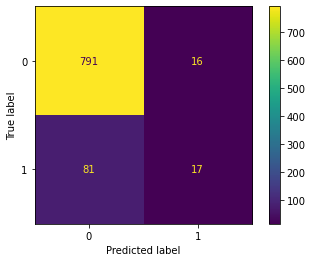

In [144]:
#import plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR,X_test,y_test)

### DECISION TREE

In [151]:
#Initalize DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [152]:
#Train the model
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [153]:
#predict and store in a variable
DT_preds=DT.predict(X_test)

In [154]:
#print classification report
print(classification_report(y_test,DT_preds))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       807
           1       0.49      0.55      0.52        98

    accuracy                           0.89       905
   macro avg       0.72      0.74      0.73       905
weighted avg       0.90      0.89      0.89       905



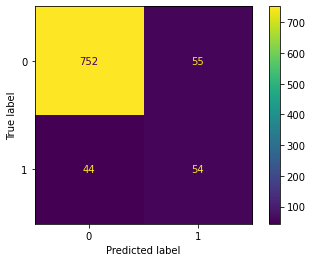

In [155]:
#view the confusion matrix
plot_confusion_matrix(DR,X_test,y_test)

### KNEIGHBOR

In [117]:
#initialize KNeighborsclassifier
KN=KNeighborsClassifier()

In [118]:
#train your model
KN.fit(X_train,y_train)

KNeighborsClassifier()

In [119]:
#store your predicition in a variable
KN_preds=KN.predict(X_test)

In [147]:
#generate a classification report
print(classification_report(y_test,KN_preds))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       807
           1       0.39      0.24      0.30        98

    accuracy                           0.88       905
   macro avg       0.65      0.60      0.62       905
weighted avg       0.86      0.88      0.86       905



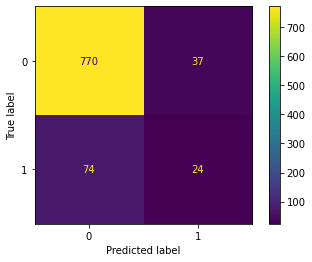

In [148]:
#view with confusion matrix
plot_confusion_matrix(KN,X_test,y_test)

### RANDOM FOREST

In [122]:
#initalize Random Forest
RF=RandomForestClassifier()

In [123]:
#train your model
RF.fit(X_train,y_train)

RandomForestClassifier()

In [124]:
#store your predicition in a new variable
RF_preds=RF.predict(X_test)

In [149]:
#print a classification report
print(classification_report(y_test,RF_preds))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       807
           1       0.60      0.21      0.32        98

    accuracy                           0.90       905
   macro avg       0.76      0.60      0.63       905
weighted avg       0.88      0.90      0.88       905



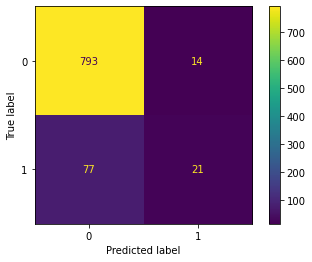

In [150]:
#confusion matrix
plot_confusion_matrix(RF,X_test,y_test)

#### Precision and recall is very important in buliding models
- precision means from all the classes we predicted as positive, how many are actually positive.
- its calculated as the ratio between true positives(1,1) to all the positives(0,1).
- Recall means from all the actual positives, how many did we predict correctly

### Feature Importance

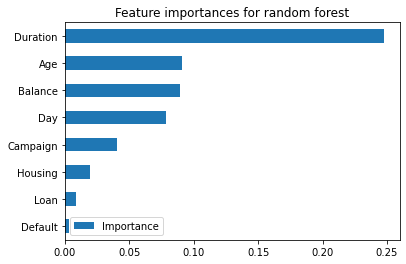

In [169]:
#get feature importances for random forest
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top 5 feature importances, sorted
RF_importances[:8].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

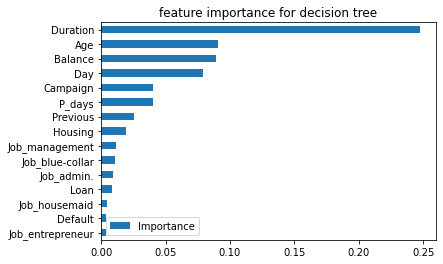

In [172]:
#get feature importance for decision tree
DT_importances=pd.DataFrame(data=RF.feature_importances_,index=X_test.columns,columns=['Importance'])

#plot top 5 feature importances, sorted
DT_importances[:15].sort_values(by='Importance').plot.barh()

plt.title('feature importance for decision tree')
plt.show()

### Cross Validation

### we need some assurance of the accuracy of predictions that our models are putting out, i'll be using the two highest models.
- Decision Tree has the accuracy score of 89%
- Random Forest has the accuracy score of 90%
#### These two models did better which might also result to overfitting.
##### For this, we need to validate our model
.

In [173]:
#import all necessary libraries
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict


In [175]:
#Decision TRee
DTV=DecisionTreeClassifier()
#train
DTV_scores=cross_val_score(DTV,X_train,y_train,cv=3)
#mean
DTV_mean=DTV_scores.mean()

In [176]:
#Random Forest
RFV=RandomForestClassifier()
#Train
RFV_scores=cross_val_score(RFV,X_train,y_train,cv=3)
#mean
RFV_mean=RFV_scores.mean()


In [177]:
#put the results as a dict and store in a variable
results={'Models':['DecisionTree','RandomForest'],'CrossVal Mean Scores':[DTV_mean,RFV_mean]}
#save it as a datframe
output=pd.DataFrame(data=results)

In [179]:
output

,Models,CrossVal Mean Scores
0,DecisionTree,0.857301
1,RandomForest,0.895463


In [180]:
#from our cross validation, Random forest is the best model for this bank predicition


In [181]:
#cross val predicition
pred=cross_val_predict(RFV,X_train,y_train,cv=3)

In [182]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [165]:
#import accuracy score
from sklearn.metrics import accuracy_score

In [183]:
#fit our model
RFV.fit(X_train,y_train)

#print the accuracy score for random forest algorithm
print(accuracy_score(y_train,pred))

0.891316371681416
